# Visualizing Time Series Data in Python

> Time series data is omnipresent in the field of Data Science. This course will provide practical knowledge on visualizing time series data using Python. Updating ...

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Python, Data Visualization, EDA, Time Series, Diagnostics, Boxplots, Histograms, Density plots, Correlation, Clustered heatmaps, Line Plots, Case Study]
- image: images/TimeSeriesVisualizing.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2


> Time series data is omnipresent in the field of Data Science. Whether it is analyzing business trends, forecasting company revenue or exploring customer behavior, every data scientist is likely to encounter time series data at some point during their work. To get you started on working with time series data, this course will provide practical knowledge on visualizing time series data using Python.

PREREQUISITES: Introduction to Data Visualization with Matplotlib, Manipulating Time Series Data in Python

[**Download Datasets and Presentation slides for this post HERE**](https://github.com/anhhaibkhn/Data-Science-selfstudy-notes-Blog/tree/master/_notebooks/Visualizing%20Time%20Series%20Data%20in%20Python)
<br>

This post is 3rd part of Time Series with Python Track from DataCamp. The track includes:
1. [Manipulating Time Series Data in Python](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/pandas/data%20visualization/eda/time%20series/stock%20price/scikit-learn/correlation/value-weighte/index/2022/08/25/Manipulating-Time-Series-Data-in-Python.html)
2. [Time Series Analysis in Python](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/python/data%20visualization/eda/time%20series/correlation/autocorrelation/arma/cointegration%20model/2022/08/26/Time-Series-Analysis-in-Python.html)
3. [Visualizing Time Series Data in Python](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/python/data%20visualization/eda/time%20series/diagnostics/boxplots/histograms/density%20plots/correlation/clustered%20heatmaps/line%20plots/case%20study/2022/08/27/Visualizing-Time-Series-Data-in-Python.html)
4. [ARIMA Models in Python](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/seasonal%20data/forecast/arima/time%20series/arma/armax/aic/bic/acf/pacf/sarima/box-jenkins/2022/08/28/ARIMA-Models-in-Python.html)
5. [Machine Learning for Time Series Data in Python](https://anhhaibkhn.github.io/Data-Science-selfstudy-notes-Blog/python/data%20visualization/eda/time%20series/machine%20learning/scikit-learn/regression/classification/tempogram/spectrogram/cross-valiation/stationarity/2022/08/29/Machine-Learning-for-Time-Series-Data-in-Python.html)

In [26]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

mpl.rcParams['figure.figsize'] = (16, 12)
mpl.rcParams['axes.grid'] = True

pd.set_option('display.expand_frame_repr', False)

for cat in [DeprecationWarning, UserWarning, FutureWarning]:
    warnings.filterwarnings("ignore", category=cat)

## Line Plots

> This chapter presents how to leverage basic plottings tools in Python, and how to annotate and personalize your time series plots. By the end of this, you will be able to take any static dataset and produce compelling plots of your data.

### Welcome to the course!




> **Load your time series data**

The most common way to import time series data in Python is by using the pandas library. You can use the read_csv() from pandas to read the contents of a file into a DataFrame. This can be achieved using the following command:

```python
df = pd.read_csv("name_of_your_file.csv")
```
Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the .head(n=5) method, where n=5 indicates that you want to print the first five rows of your DataFrame.

In this exercise, you will read in a time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959, and display its first five rows.

Instructions: <br>

- Import the pandas library using the pd alias.
- Read in the time series data from the csv file located at url_discoveries into a DataFrame called discoveries.
- Print the first 5 lines of the DataFrame using the .head() method.



In [13]:
url_discoveries = 'https://assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv'
# or
url_local = './datasets/ch1_discoveries.csv'

In [20]:
# Import pandas
import pandas as pd

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(url_discoveries)
discoveries_local = pd.read_csv(url_local)

# Display the first five lines of the DataFrame
print(discoveries.head())
print(discoveries_local.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0
         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


> **Test whether your data is of the correct type**

When working with time series data in pandas, any date information should be formatted as a datetime64 type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the .dtypes attribute. Fortunately, if your date columns come as strings, epochs, etc… you can use the to_datetime() function to convert them to the appropriate datetime64 type:

df['date_column'] = pd.to_datetime(df['date_column'])
In this exercise, you will learn how to check the data type of the columns in your time series data and convert a date column to the appropriate datetime type.

Instructions: <br>

- Print out the data type of the column in the discoveries object.
- Convert the date column in the discoveries DataFrame to the datetime type.
- Print out the data type of the column in the discoveries object again to check that your conversion worked.

In [21]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


### Plot your first time series


> **Your first plot!**

Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.

matplotlib is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the pandas library has implemented a .plot() method on Series and DataFrame objects that is a wrapper around matplotlib.pyplot.plot(), which makes it easier to produce plots.

Instructions: <br>

- Set the 'date' column as the index of your DataFrame.
- Using the discoveries DataFrame, plot the time series in your DataFrame using a "blue" line plot and assign it to ax.
- Specify the x-axis label on your plot: 'Date'.
- Specify the y-axis label on your plot: 'Number of great discoveries'.

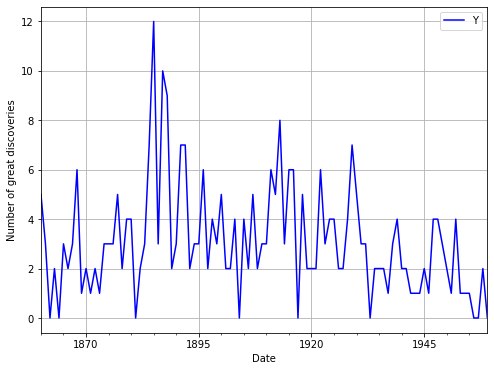

In [22]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

 It looks like the largest number of great discoveries happened during the year of 1885.

> **Specify plot styles**

The matplotlib library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command plt.style.use(your_stylesheet) where your_stylesheet is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command print(plt.style.available). For the rest of this course, we will use the awesome fivethirtyeight style sheet.

Instructions: <br>

- Import matplotlib.pyplot using its usual alias plt.
- Use the fivethirtyeight style sheet to plot a line plot of the discoveries data.

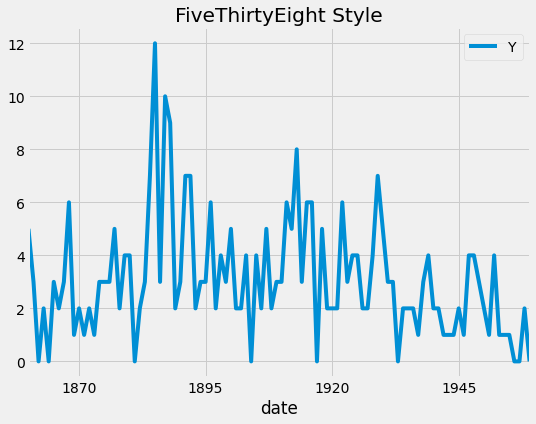

In [23]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

- Use the ggplot style sheet to plot a line plot of the discoveries data.
- Set the title of your second plot as 'ggplot Style'.

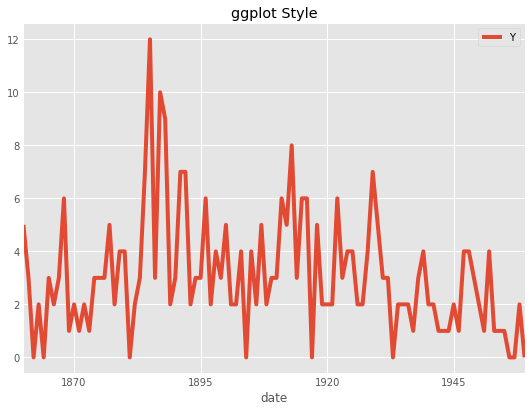

In [24]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

> **Display and label plots**

As you saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the .plot() method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation ax = df.plot(...) and wondered about the purpose of the ax object. This is because the plot function returns a matplotlib AxesSubplot object, and it is common practice to assign this returned object to a variable called ax. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.

Instructions: <br>

- Specify the color of the line as 'blue'.
- Width of the line as 2.
- The dimensions of your plot to be of length 8 and width 3.
- Specify the fontsize of 6.



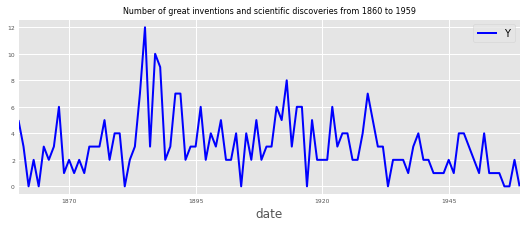

In [25]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color ='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

### Customize your time series plot


> **Subset time series data**

When plotting time series data, you may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range: <br>

```python
subset_data = discoveries['1950-01-01':'1960-01-01']
```
Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the datetime type. Failing that, the pandas library will return an error message.

Instructions<br>

- Use discoveries to create a new DataFrame discoveries_subset_1 that contains all the data between January 1, 1945 and January 1, 1950.
- Plot the time series of discoveries_subset_1 using a "blue" line plot.

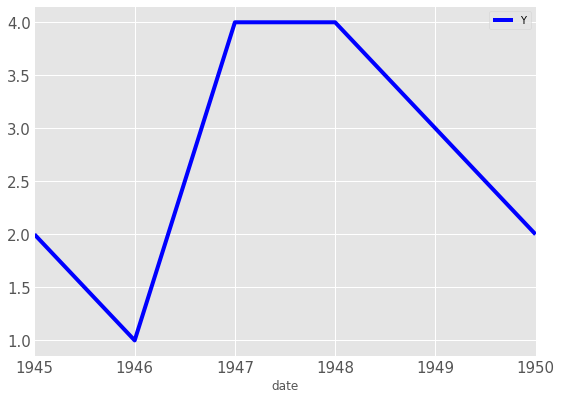

In [26]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

- Use discoveries to create a new DataFrame discoveries_subset_2 that contains all the data between January 1, 1939 and January 1, 1958.
- Plot the time series of discoveries_subset_2 using a "blue" line plot.

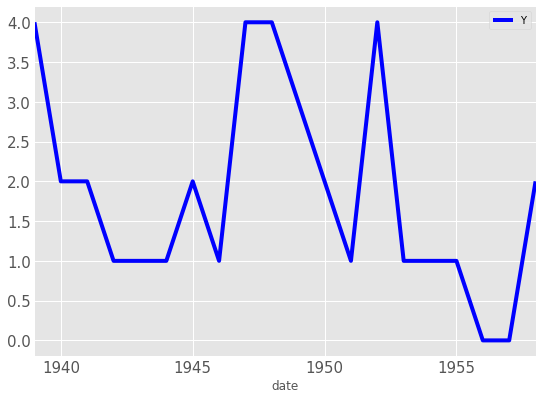

In [27]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

 It looks like there were no great discoveries in 1956 and 1957!

> **Add vertical and horizontal markers**

Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command: <br>

```python
ax.axvline('1945-01-01', linestyle='--')
```
<br>
Instructions: <br>

- Add a red vertical line at the date January 1, 1939 using the .axvline() method.
- Add a green horizontal line at the y-axis value 4 using the .axhline() method.

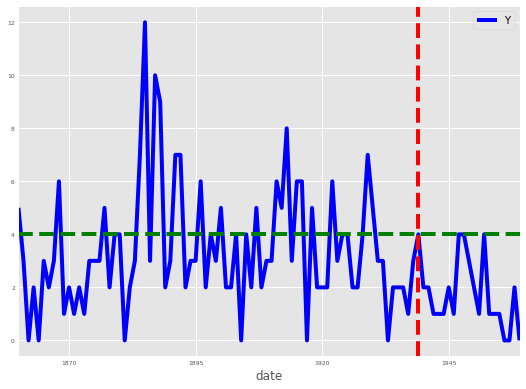

In [28]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

 Adding vertical and horizontal markers to a graph is a powerful feature, so hopefully it will be helpful to you!

> **Add shaded regions to your plot**

When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command: <br>

```python
ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)
```
<br>
Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

Instructions: <br>

- Use the ```.axvspan()``` method to add a vertical red shaded region between the dates of January 1, 1900 and January 1, 1915 with a transparency of 0.3.
- Use the .axhspan() method to add a horizontal green shaded region between the values of 6 and 8 with a transparency of 0.3.

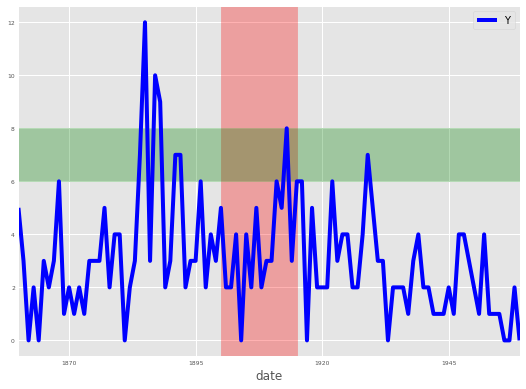

In [33]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

## Summary Statistics and Diagnostics

> In this chapter, you will gain a deeper understanding of your time series data by computing summary statistics and plotting aggregated views of your data.


### Clean your time series data

> **Find missing values**

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called df that contains time series data, you can use the command: <br>

```python
missing_values = df.isnull().sum()
```
In this exercise, you will learn how to find whether your data contains any missing values.

Instructions: <br>

- Set the 'datestamp' column as the index of the co2_levels DataFrame.
- Print the total number of missing values in co2_levels.



In [30]:
co2_levels = pd.read_csv('./datasets/ch2_co2_levels.csv')

In [31]:
# Display first seven rows of co2_levels
print(co2_levels.head(7))

# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN
co2    59
dtype: int64


 It looks like the co2_levels DataFrame contains missing values, let's see how we can handle those!


> **Handle missing values**

In order to replace missing values in your time series data, you can use the command: <br>
```python
df = df.fillna(method="ffill")
```
<br>
where the argument specifies the type of method you want to use. For example, specifying bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

Recall from the previous exercise that co2_levels has 59 missing values.

Instructions:<br>

- Impute these missing values in co2_levels by using backfilling.
- Print the total number of missing values.

In [32]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method="bfill")

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


It looks like the co2_levels DataFrame contained 59 missing values, but you have taken care of those!


### Plot aggregates of your data

> **Display rolling averages**

It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command: <br>
```python
df_mean = df.rolling(window=12).mean()
```
<br>
The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

Instructions: <br>

- Compute the 52 weeks rolling mean of co2_levels and assign it to ma.
- Compute the 52 weeks rolling standard deviation of co2_levels and assign it to mstd.
- Calculate the upper bound of time series which can defined as the rolling mean + (2 * rolling standard deviation) and assign it to ma[upper]. Similarly, calculate the lower bound as the rolling mean - (2 * rolling standard deviation) and assign it to ma[lower].
- Plot the line chart of ma.

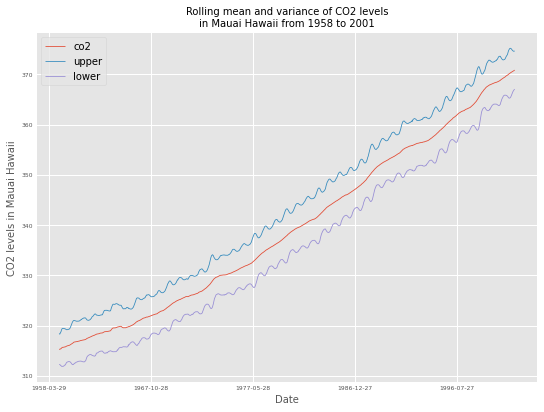

In [34]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standart deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

# Plot the content of the ma DataFrame
ax =  ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

Showing the rolling mean and standard deviation of your data allows to get a more compact view of your data.


> **Display aggregated values**

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index: <br>
```python
# extract of the year in each dates of the df DataFrame
index_year = df.index.year
```
<br>
To extract the month or day of the dates in the indices of the df DataFrame, you would use df.index.month and df.index.day, respectively. You can then use the extracted year of each indices in the co2_levels DataFrame and the groupby function to compute the mean CO2 levels by year: <br>

```python
df_by_year = df.groupby(index_year).mean()
```
<br>
Instructions: <br>

- Extract the month for each of the dates in the index of the co2_levels DataFrame and assign the values to a variable called index_month.
- Using the groupby and mean functions from the pandas library, compute the monthly mean CO2 levels in the co2_levels DataFrame and assign that to a new DataFrame called mean_co2_levels_by_month.
- Plot the values of the mean_co2_levels_by_month DataFrame using a fontsize of 6 for the axis ticks.

In [36]:
co2_levels.index = pd.to_datetime(co2_levels.index)

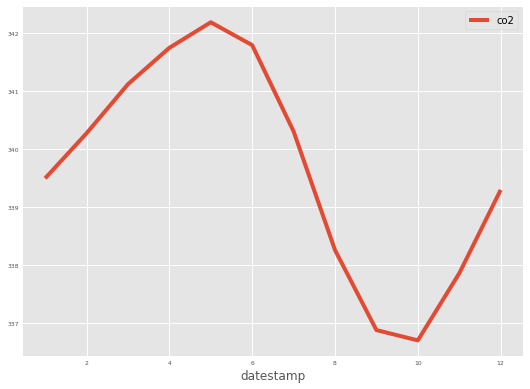

In [37]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!

### Summarize the values in your time series data

> **Compute numerical summaries**

You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In pandas, it is possible to quickly obtain summaries of columns in your DataFrame by using the command: <br>

```python
print(df.describe())
```
<br>
This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your pandas DataFrame. <br>

Instructions: <br>

- Print the statistical summaries of the co2_levels DataFrame.
- Print the reported minimum value in the co2_levels DataFrame.
- Print the reported maximum value in the co2_levels DataFrame.

In [38]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


It looks like the CO2 levels data has an average value of 340.


> **Boxplots and Histograms**

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the .boxplot() method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below: <br>
```python
ax = co2_levels.plot(kind='hist', bins=100)
```
Here, we used the standard .plot() method but specified the kind argument to be 'hist'. In addition, we also added the bins=100 parameter, which specifies how many intervals (i.e bins) we should cut our data into.

Instructions: <br>

- Using the co2_levels DataFrame, produce a boxplot of the CO2 level data.
- Using the co2_levels DataFrame, produce a histogram plot of the CO2 level data with 50 bins.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


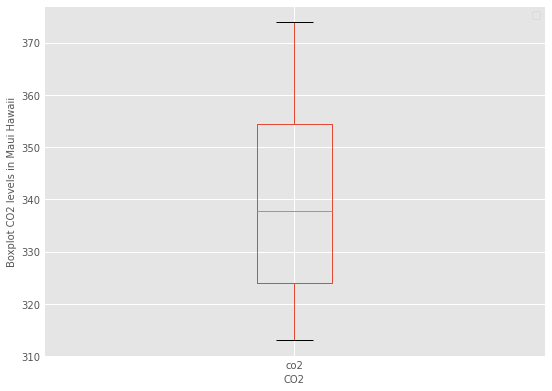

In [40]:
# Generatea boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

- Using the co2_levels DataFrame, produce a histogram plot of the CO2 level data with 50 bins.

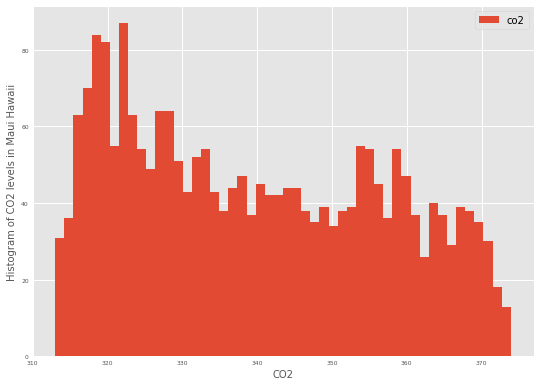

In [41]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

> **Density plots**

In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below: <br>
```python 
ax = df.plot(kind='density', linewidth=2)
```
<br>
The standard .plot() method is specified with the kind argument set to 'density'. We also specified an additional parameter linewidth, which controls the width of the line to be plotted.

Instructions: <br>

- Using the co2_levels DataFrame, produce a density plot of the CO2 level data with line width parameter of 4.
- Annotate the x-axis labels of your boxplot with the string 'CO2'.
- Annotate the y-axis labels of your boxplot with the string 'Density plot of CO2 levels in Maui Hawaii'.

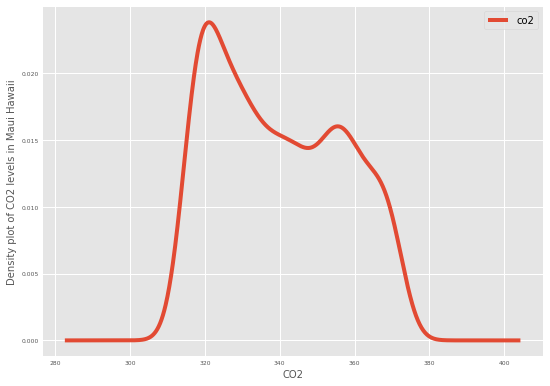

In [42]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

## Seasonality, Trend and Noise

> You will go beyond summary statistics by learning about autocorrelation and partial autocorrelation plots. You will also learn how to automatically detect seasonality, trend and noise in your time series data.

### Autocorrelation and Partial autocorrelation

> **Autocorrelation in time series data**

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

Instructions: <br>

- Import tsaplots from statsmodels.graphics.
- Use the plot_acf() function from tsaplots to plot the autocorrelation of the 'co2' column in co2_levels.
- Specify a maximum lag of 24.


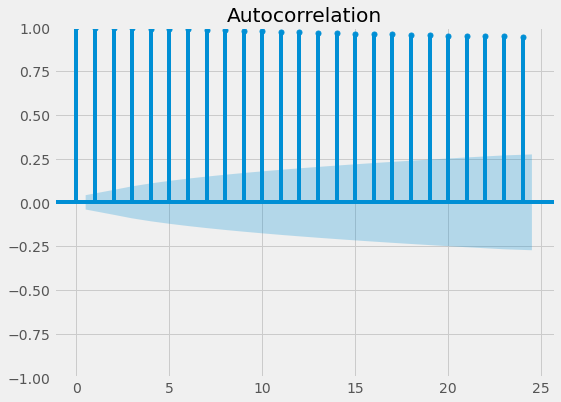

In [44]:
# Import required libraries
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

 Autocorrelation plots can be used to quickly discover patterns into your time series, so let's delve a little bit deeper into that!


> **Interpret autocorrelation plots**

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

![alt text](https://assets.datacamp.com/production/course_5226/datasets/ch3_acf.png)


> Answer: They are highly correlated and statistically significant.


> **Partial autocorrelation in time series data**

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, …) and its own values lagged by 3 time points (t_4, t_5, t_6, …), but only after removing all effects attributable to lags 1 and 2.

The ```plot_pacf()``` function in the statsmodels library can be used to measure and plot the partial autocorrelation of a time series.

Instructions: <br>

- Import tsaplots from statsmodels.graphics.
- Use the plot_pacf() function from tsaplots to plot the partial autocorrelation of the 'co2' column in co2_levels.
- Specify a maximum lag of 24.

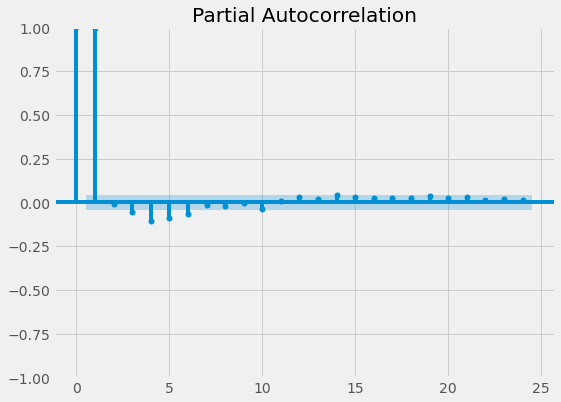

In [46]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

> **Interpret partial autocorrelation plots**

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In the partial autocorrelation plot below, at which lag values do we have statistically significant partial autocorrelations? <br>

![](https://assets.datacamp.com/production/course_5226/datasets/ch3_pacf.png)


> Answer: 0, 1, 4,5,6 = there are the additional lag values that are beyond the confidence intervals.


### Seasonality, trend and noise in time series data

> **Time series decomposition**

When visualizing time series data, you should look out for some distinguishable patterns: <br>

- seasonality: does the data display a clear periodic pattern?
- trend: does the data follow a consistent upwards or downward slope?
- noise: are there any outlier points or missing values that are not consistent with the rest of the data?
<br>
You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.<br>
```python
decomposition = sm.tsa.seasonal_decompose(time_series)
``` 
<br>
You can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

Instructions: <br> 

- Import statsmodels.api using the alias sm.
- Perform time series decomposition on the co2_levels DataFrame into a variable called decomposition.
- Print the seasonality component of your time series decomposition.

In [47]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


 Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.

> **Plot individual components**

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, resid) components. <br>
```python
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid
```
<br>
You can then use the extracted components and plot them individually.

The decomposition object you created in the last exercise is available in your workspace.

Instructions:<br>

- Extract the trend component from the decomposition object.
- Plot this trend component.

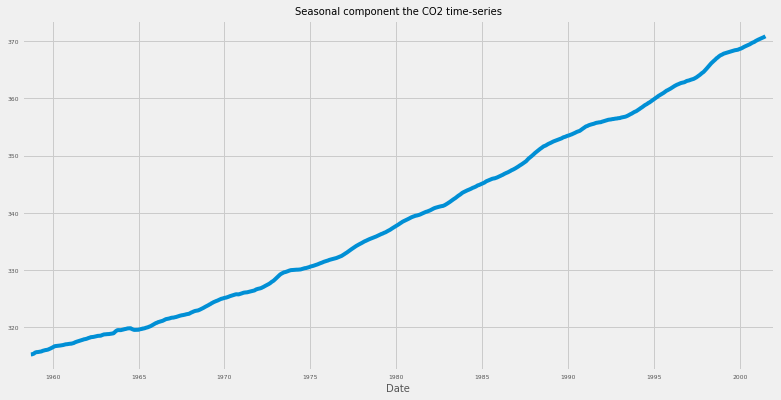

In [48]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

### A quick review

> **Visualize the airline dataset**

You will now review the contents of chapter 1. You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

We have printed the first 5 and the last 5 rows of the airline DataFrame for you to review.

Instructions: <br>

- Plot the time series of airline using a "blue" line plot.
- Add a vertical line on this plot at December 1, 1955.
- Specify the x-axis label on your plot: 'Date'.
- Specify the title of your plot: 'Number of Monthly Airline Passengers'.

In [4]:
airline = pd.read_csv('./datasets/ch3_airline_passengers.csv', parse_dates = ['Month'], index_col = 'Month')
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


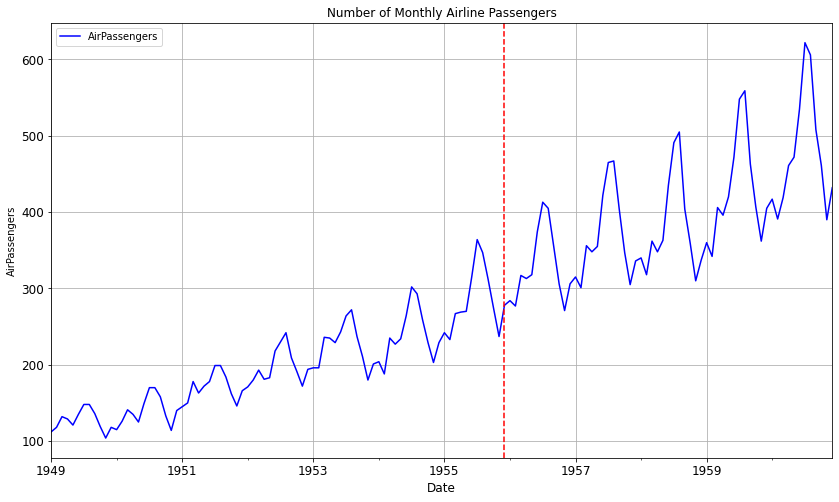

In [8]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12, figsize=(14, 8))

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('AirPassengers')
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?

> **Analyze the airline dataset**

In Chapter 2 you learned:

- How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a pandas DataFrame.
- To generate boxplots of your data to quickly gain insight in your data.
- Display aggregate statistics of your data using groupby(). <br>
In this exercise, you will apply all these concepts on the airline DataFrame.

Instructions: <br>

- Print the numbers of missing values in the airline DataFrame.
- Print the summary statistics of all the numeric columns in airline.

In [9]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


- Generate a boxplot of the monthly volume of airline passengers data.

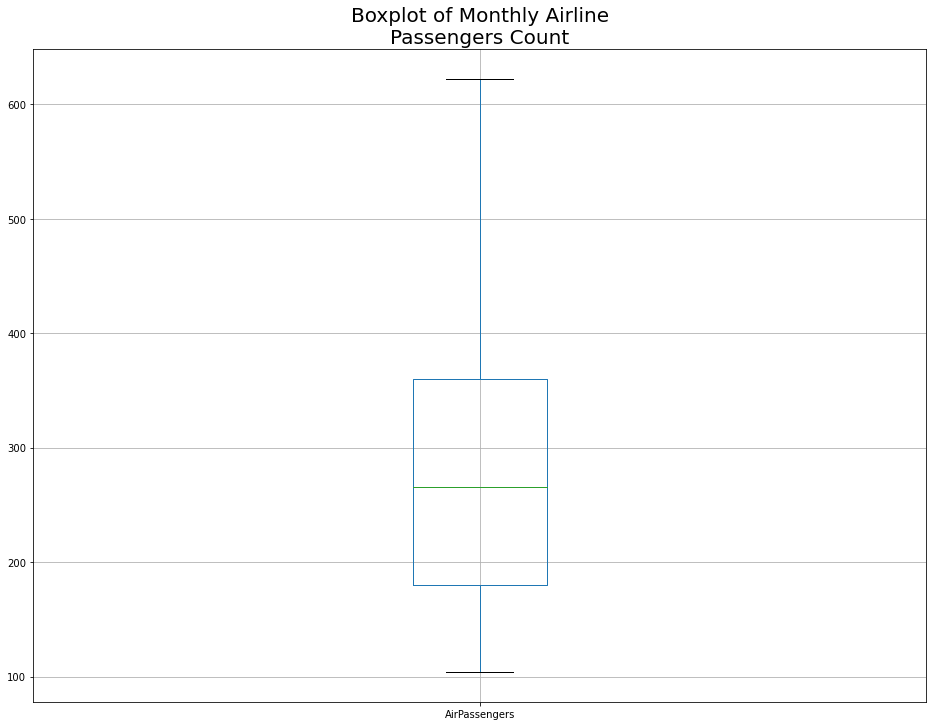

In [13]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

- Extract the month from the index of airline.
- Compute the mean number of passengers per month in airline and assign it to mean_airline_by_month.
- Plot the mean number of passengers per month in airline.

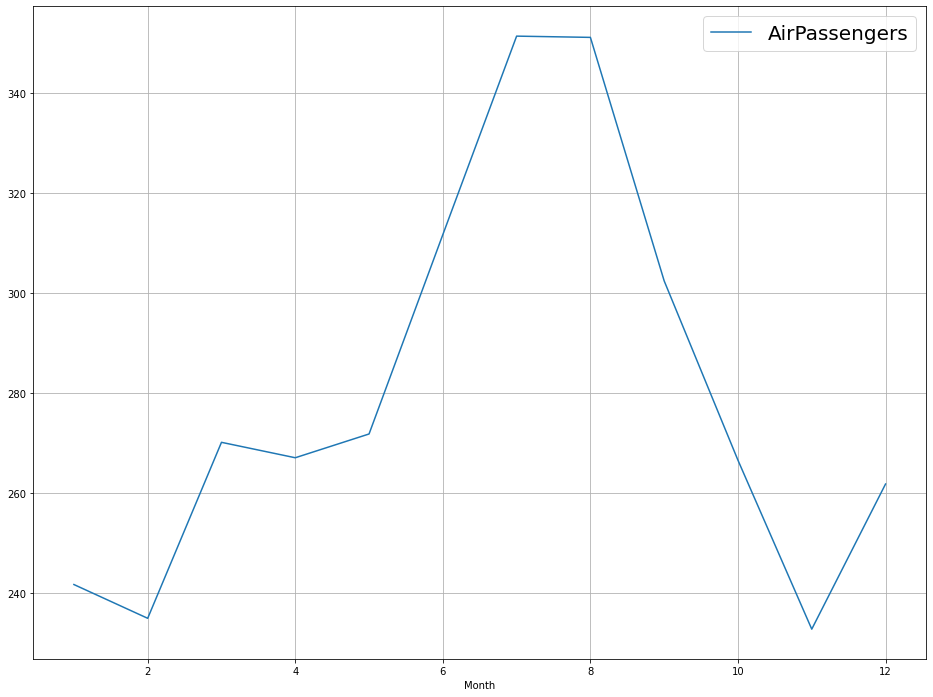

In [14]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

 Looks like July and August are the busiest months!

> **Time series decomposition of the airline dataset**

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal components.

We placed the trend and seasonal components in the airline_decomposed DataFrame.

Instructions: <br>

- Print the first 5 rows of airline_decomposed.
- Plot these two components on the same graph.

In [18]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [19]:
airline_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=airline.index, columns=['trend', 'seasonal'])
airline_decomposed.head()

,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313


            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


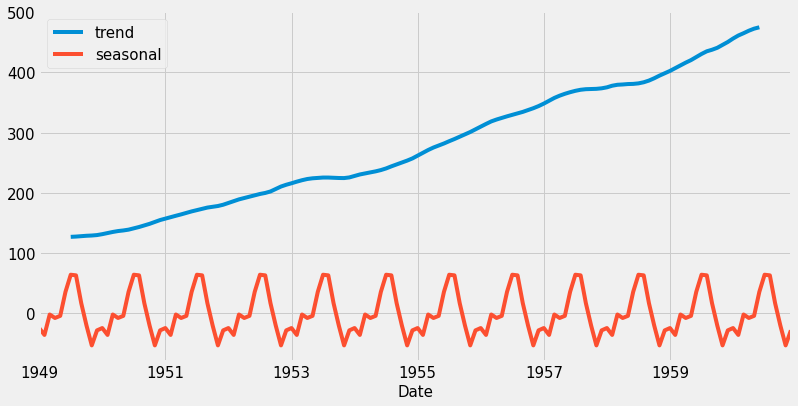

In [22]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the df_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Work with Multiple Time Series

> In the field of Data Science, it is common to be involved in projects where multiple time series need to be studied simultaneously. In this chapter, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series.



### Working with more than one time series

> **Load multiple time series**

Whether it is during personal projects or your day-to-day work as a Data Scientist, it is likely that you will encounter situations that require the analysis and visualization of multiple time series at the same time.

Provided that the data for each time series is stored in distinct columns of a file, the pandas library makes it easy to work with multiple time series. In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.

Instructions: <br>

- Read in the the csv file located at url_meat into a DataFrame called meat.
- Convert the date column in meat to the datetime type.
- Set the date column as the index of meat.
- Print the summary statistics of all the numeric columns in meat.

In [2]:
# Read in meat DataFrame
meat = pd.read_csv('./datasets/ch4_meat.csv')

# Review the first five lines of the meat DataFrame
display(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
meat.describe()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


> **Visualize multiple time series**

If there are multiple time series in a single DataFrame, you can still use the .plot() method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.

With the pandas library, you can simply leverage the .plot.area() method to produce area charts of the time series data in your DataFrame.

Instructions: <br>

- Plot all the time series data in the meat DataFrame.
- Make sure to specify a line width of 2 and a font size of 12.

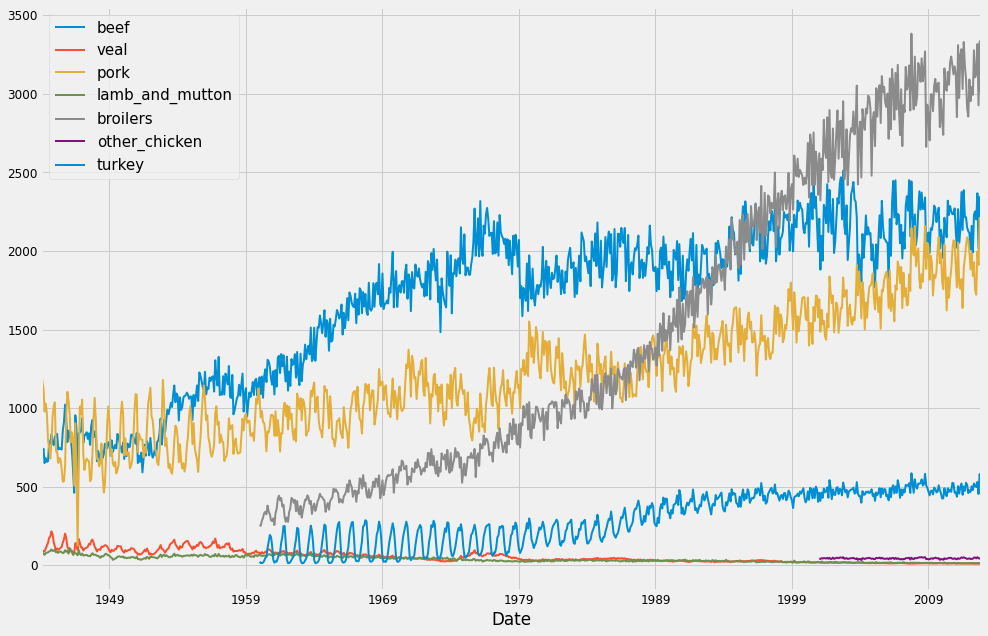

In [26]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

- Plot an area chart all the time series data in the meat DataFrame.

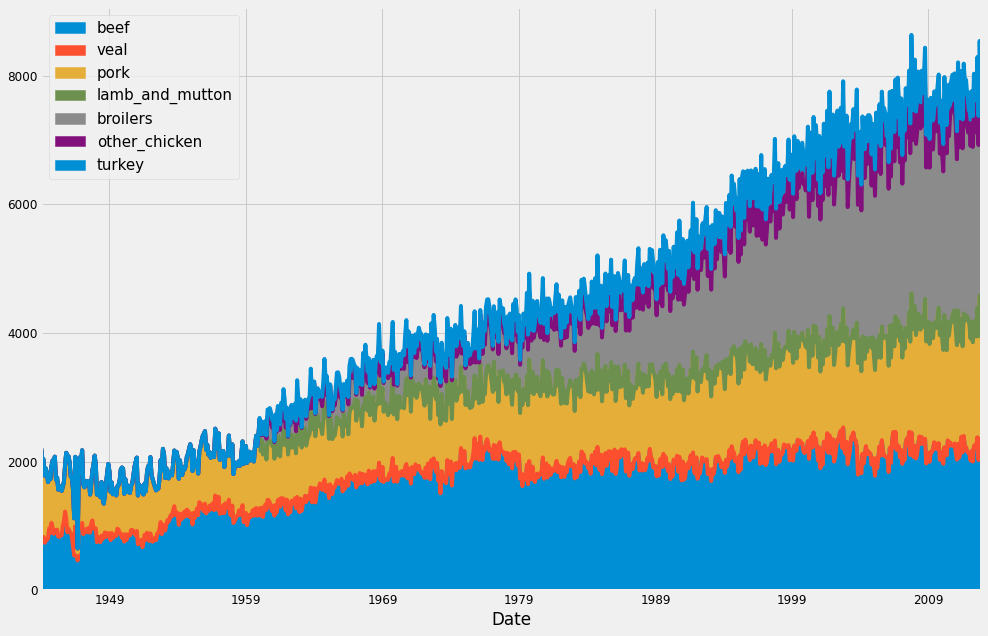

In [27]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

 It looks the time series in the meat DataFrame have very different growth rates!


> **Statistical summaries of multiple time series**

As seen in the last exercise, the time series in the meat DataFrame display very different behavior over time.

Using the summary statistics presented on your right, can you identify the time series with the highest mean and maximum value, respectively?


Answer: beef has the highest mean and broilers has the maximum value.


In [ ]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()


### Plot multiple time series

> **Define the color palette of your plots**

When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the colormap argument to .plot() to automatically assign specific color palettes with varying contrasts. You can either provide a matplotlib colormap as an input to this parameter, or provide one of the default strings that is available in the colormap() function available in matplotlib (all of which are available here).

For example, you can specify the 'viridis' colormap using the following command:

```python
df.plot(colormap='viridis')

```

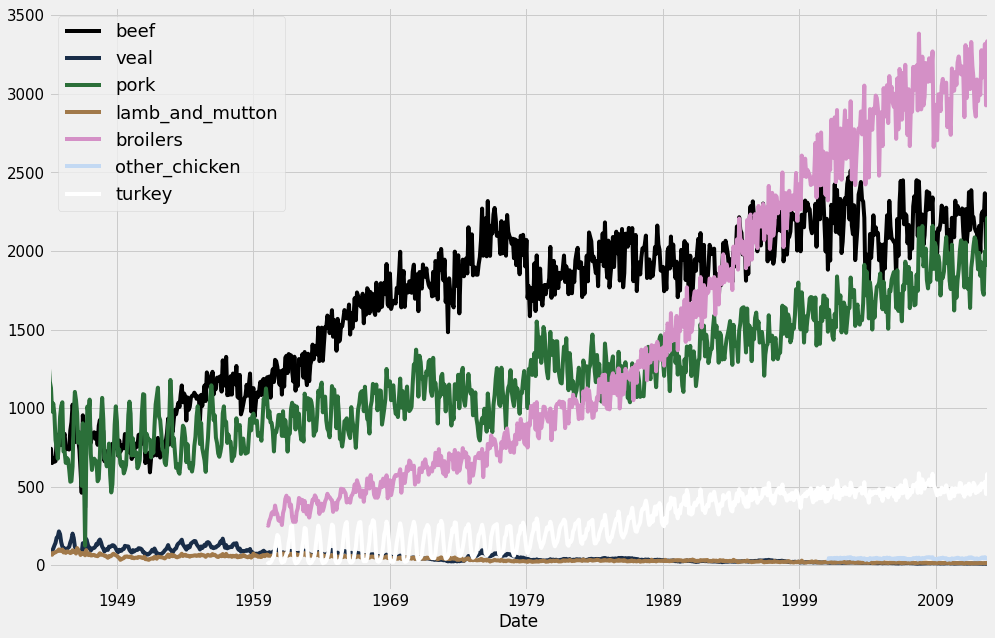

In [28]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

- Plot the time series data in the meat DataFrame and set the color palette to 'PuOr'.

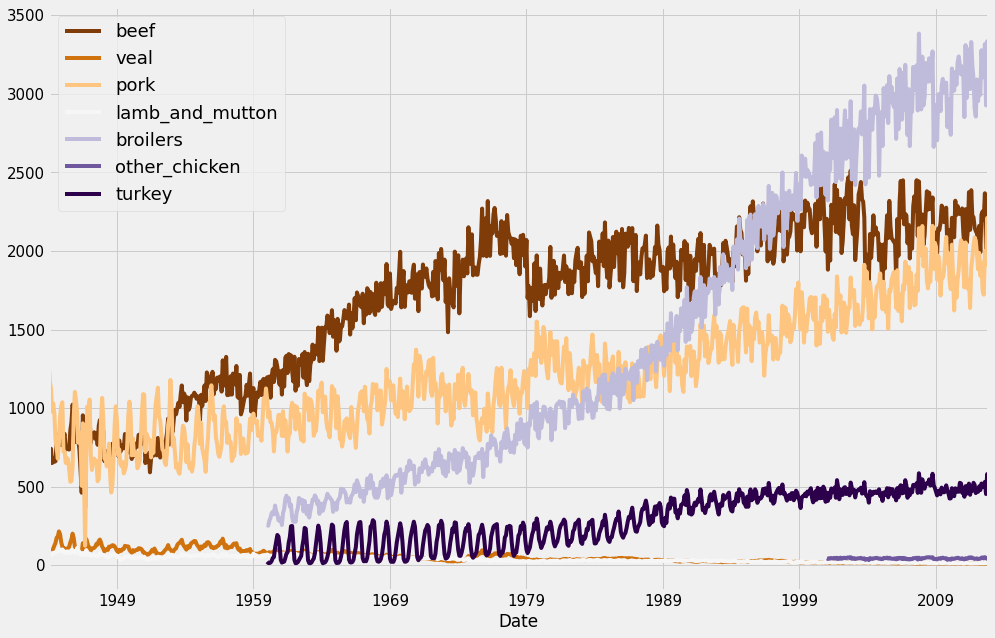

In [29]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

> **Add summary statistics to your time series plot**

It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the table method:

```python
# Plot the time series data in the DataFrame
ax = df.plot()

# Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values, 
         colWidths=[0.3]*len(df.columns), 
         rowLabels=df_summary.index, 
         colLabels=df_summary.columns, 
         loc='top')

```

In [30]:
des = meat.describe().loc['mean']
meat_mean = pd.DataFrame([des.values], columns=des.index.values, index=['mean'])
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


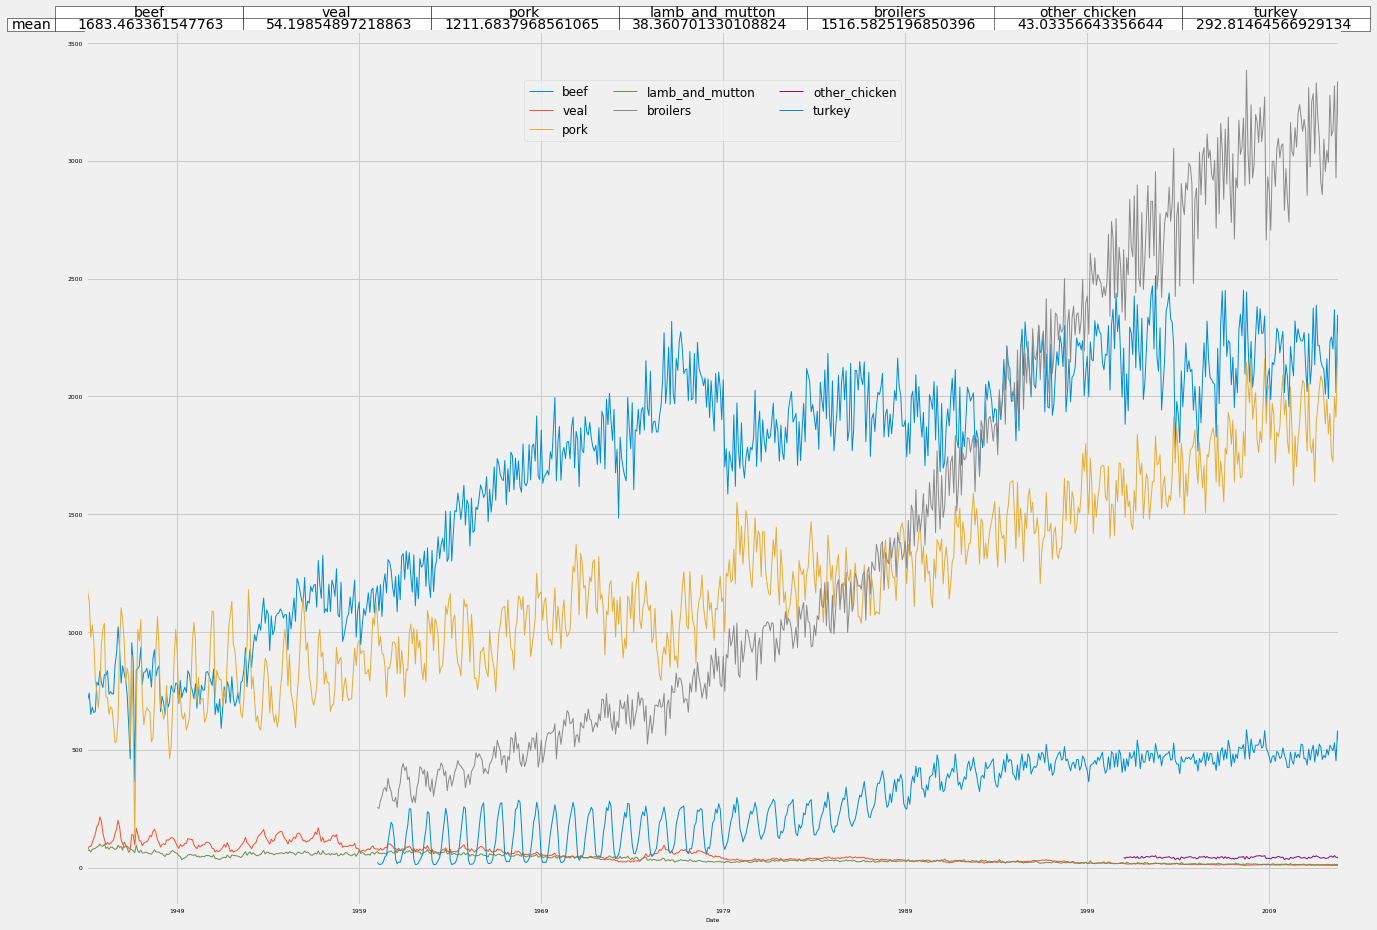

In [31]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1,figsize=(20,15))

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index.values,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)

# Show plot
plt.show()

> **Plot your time series on individual plots**

It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the subplots argument to True. In addition, the arguments that can be added are:

- layout: specifies the number of rows x columns to use.
- sharex and sharey: specifies whether the x-axis and y-axis values should be shared between your plots.

Instructions: <br>

- Create a facetted plot of the meat DataFrame using a layout of 2 rows and 4 columns.
- Ensure that the subgraphs do not share x-axis and y-axis values.

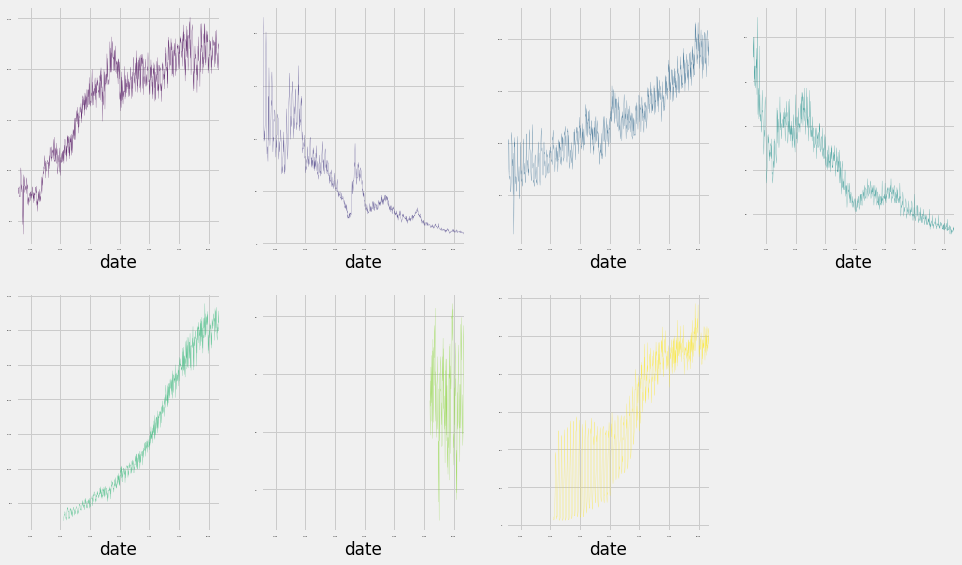

In [32]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True,
          figsize=(15,9),
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show()

### Find relationships between multiple time series

> **Compute correlations between time series**

The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.

Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

Instructions: <br>

- Print the correlation matrix between the beef and pork columns in the meat DataFrame using the Spearman method.
- Based on the above matrix, print the correlation value between beef and pork columns.

In [33]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.828


Instructions: <br>

- Compute the correlation between the pork, veal and turkey columns in meat using the Pearson method. Based on these results, print the correlation between:
    - veal and pork
    - veal and turkey
    - pork and turkey

In [34]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr('pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.809
-0.768
0.835



> **Visualize correlation matrices**

The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

```python
df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
```

You can use the .xticks() and .yticks() methods to rotate the axis labels so they don't overlap.

To learn about the arguments to the heatmap() function, refer to this page.

Instructions: <br>

- Import seaborn as sns.
- Compute the correlation between all columns in the meat DataFrame using the Spearman method and assign the results to a new variable called corr_meat.
- Plot the heatmap of corr_meat.

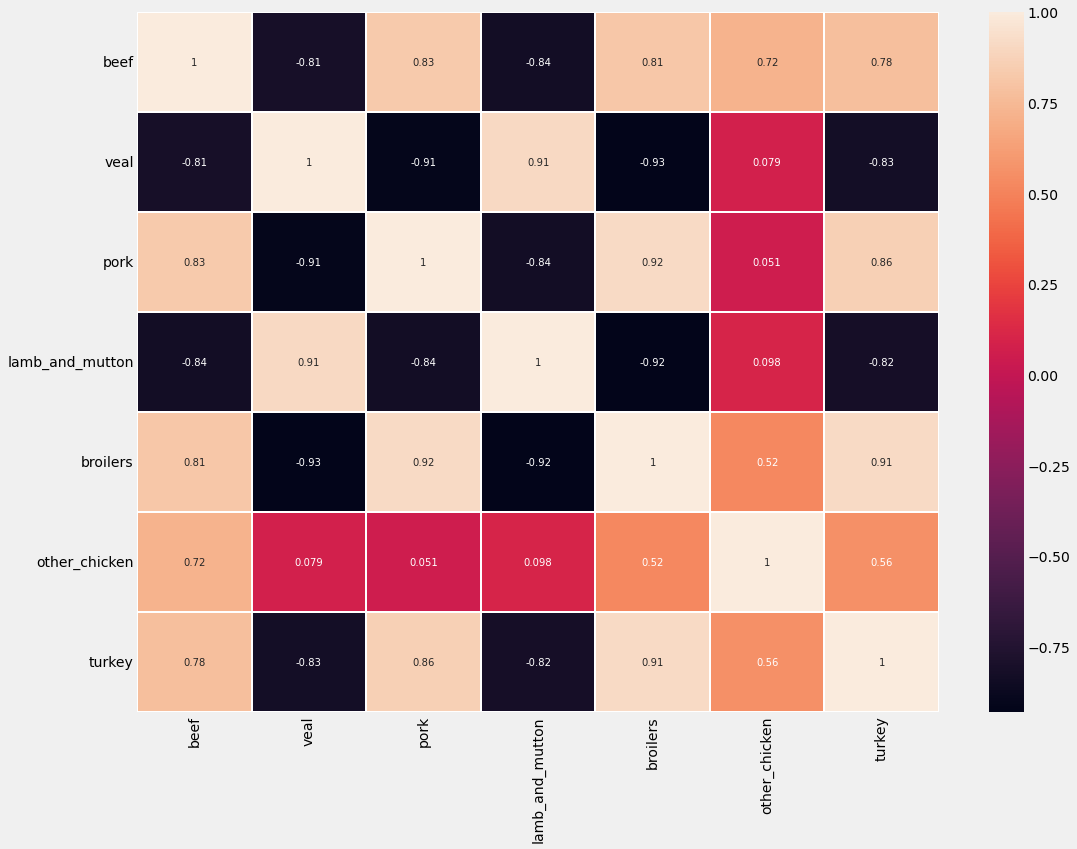

In [35]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

> **Clustered heatmaps**

Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

```python
df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

```
To prevent overlapping of axis labels, you can reference the Axes from the underlying fig object and specify the rotation. You can learn about the arguments to the clustermap() function here.

Instructions: <br>

- Import seaborn as sns.
- Compute the correlation between all columns in the meat DataFrame using the Pearson method and assign the results to a new variable called corr_meat.
- Plot the clustermap of corr_meat.

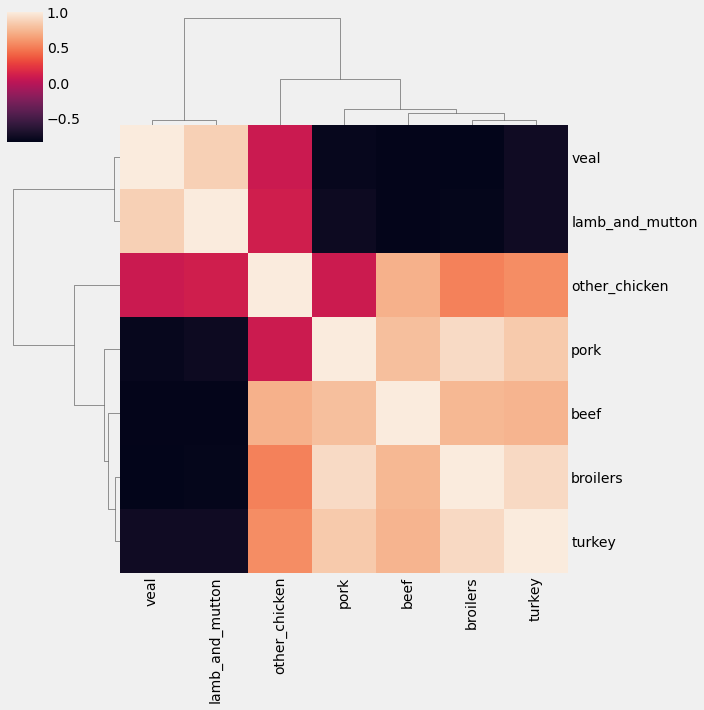

In [36]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr('pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

## Case Study: Unemployment Rate

> This chapter will give you a chance to practice all the concepts covered in the course. You will visualize the unemployment rate in the US from 2000 to 2010.

### Apply your knowledge to a new dataset

> **Explore the Jobs dataset**

In this exercise, you will explore the new jobs DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.

Instructions: <br>

- Read in the the csv file located at url_jobs into a DataFrame called jobs and review the data type of each column.
- Convert the datestamp column in jobs to the datetime type.
- Set the datestamp column as the index of jobs.
- Print the number of missing values in each column of jobs.

<AxesSubplot:xlabel='veal', ylabel='lamb_and_mutton'>

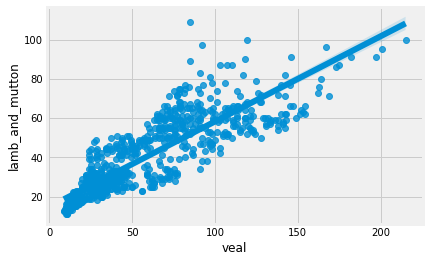

In [4]:
import seaborn as sns

sns.regplot(x=meat['veal'], y=meat['lamb_and_mutton'])

In [38]:
jobs = pd.read_csv('./datasets/ch5_employment.csv')
display(jobs.head())

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [39]:
display(jobs.tail())

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5
121,2010-02-01,18.8,12.0,27.1,13.6,5.6,7.5,4.0,10.0,12.7,12.1,10.7,9.7,9.9,6.5,10.5,10.0


In [8]:
url_jobs = 'https://assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv'

In [10]:
# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
# print(jobs.head(5))
display(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information         

> **Describe time series data with boxplots**

You should always explore the distribution of the variables, and because you are working with time series, you will explore their properties using boxplots and numerical summaries. As a reminder, you can plot data in a DataFrame as boxplots with the command:
```python
df.boxplot(fontsize=6, vert=False)
```
Notice the introduction of the new parameter vert, which specifies whether to plot the boxplots horizontally or vertically.

Instructions: <br>

- Generate a boxplot of all the time series in jobs.
- Print out a numerical statistical summary of all the time series in jobs.
- Review the results and print the name of the time series with the highest mean value and with the most variability (i.e., with the highest standard deviation).

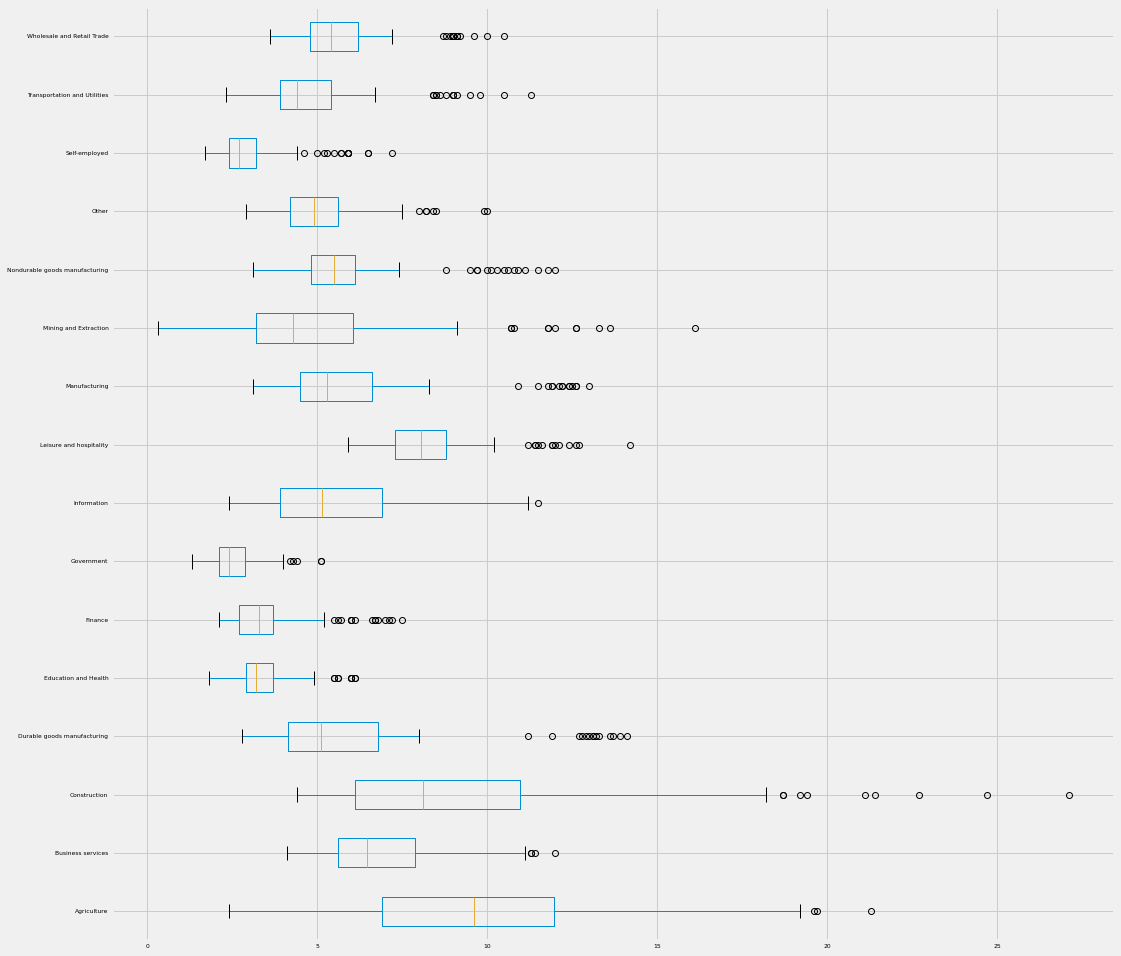

In [32]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()



In [33]:
# Generate numerical summaries
display(jobs.describe())

# Print the name of the time series with the highest mean
print("Agriculture")

# Print the name of the time series with the highest variability
print("Construction")

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


Agriculture
Construction


 Looks like the time series in your data are pretty different to another, let's dig into this a bit more and plot them!

### Beyond summary statistics

> **Plot all the time series in your dataset**

The jobs DataFrame contains 16 time series representing the unemployment rate of various industries between 2001 and 2010. This may seem like a large amount of time series to visualize at the same time, but Chapter 4 introduced you to facetted plots. In this exercise, you will explore some of the time series in the jobs DataFrame and look to extract some meaningful information from these plots.

Instructions: <br>

- Review the first 5 rows of jobs_subset.
- Create a faceted plot of the new jobs_subset DataFrame using a layout of 2 rows and 2 columns. Make sure to also specify that the subgraphs do not share x-axis and y-axis values.

In [34]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
# print(jobs_subset.head())
display(jobs_subset.head())

,Finance,Information,Manufacturing,Construction
datestamp,,,,
2000-01-01,2.7,3.4,3.6,9.7
2000-02-01,2.8,2.9,3.4,10.6
2000-03-01,2.6,3.6,3.6,8.7
2000-04-01,2.3,2.4,3.7,5.8
2000-05-01,2.2,3.5,3.4,5.0


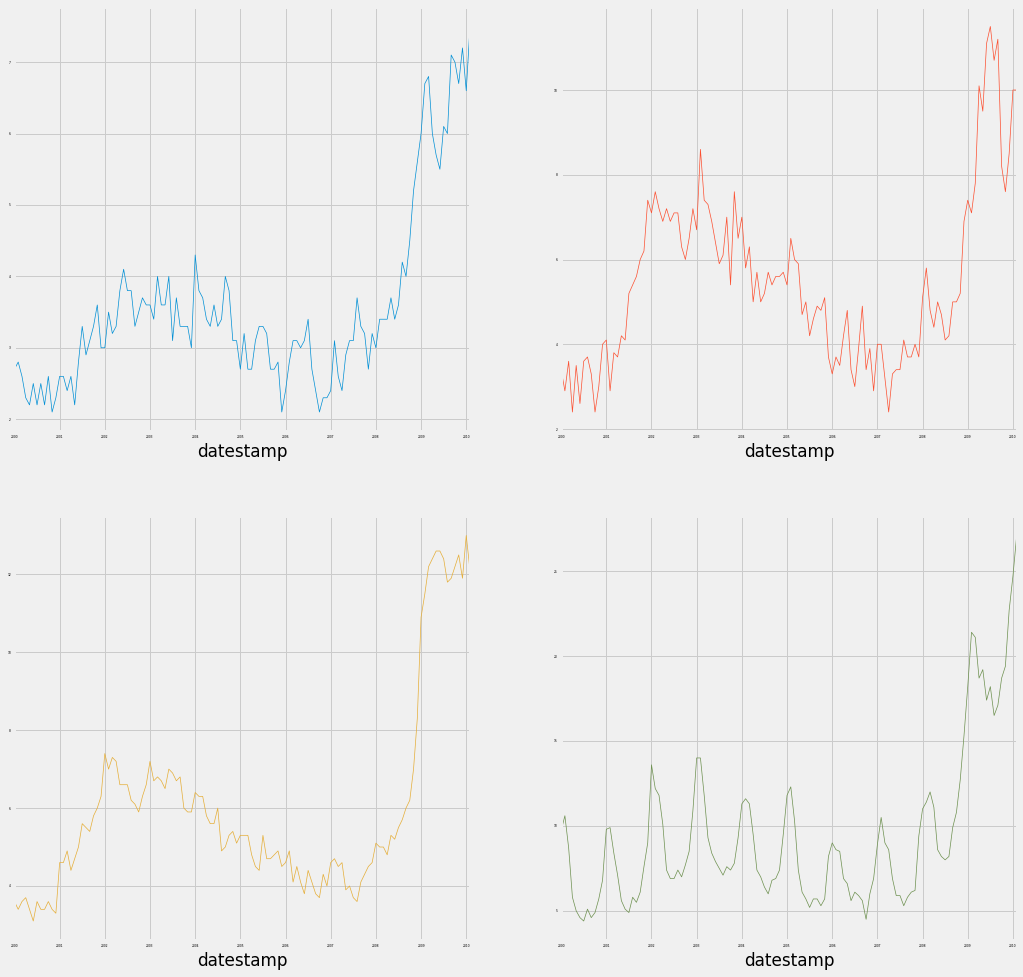

In [35]:
# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

The plots really show that there was a drastic increase in unemployment rate during in 2001 and 2008!

> **Annotate significant events in time series data**

When plotting the Finance, Information, Manufacturing and Construction time series of the jobs DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.

Recall that you have already set the datestamp column as the index of the jobs DataFrame, so you are prepared to directly annotate your plots with vertical or horizontal lines.

Instructions: <br>

- Plot all the time series in jobs on a single graph, and use the Spectral color palette.
    - Add a blue vertical line at the date 2001-07-01.
    - Add a second blue vertical line at the date 2008-09-01.

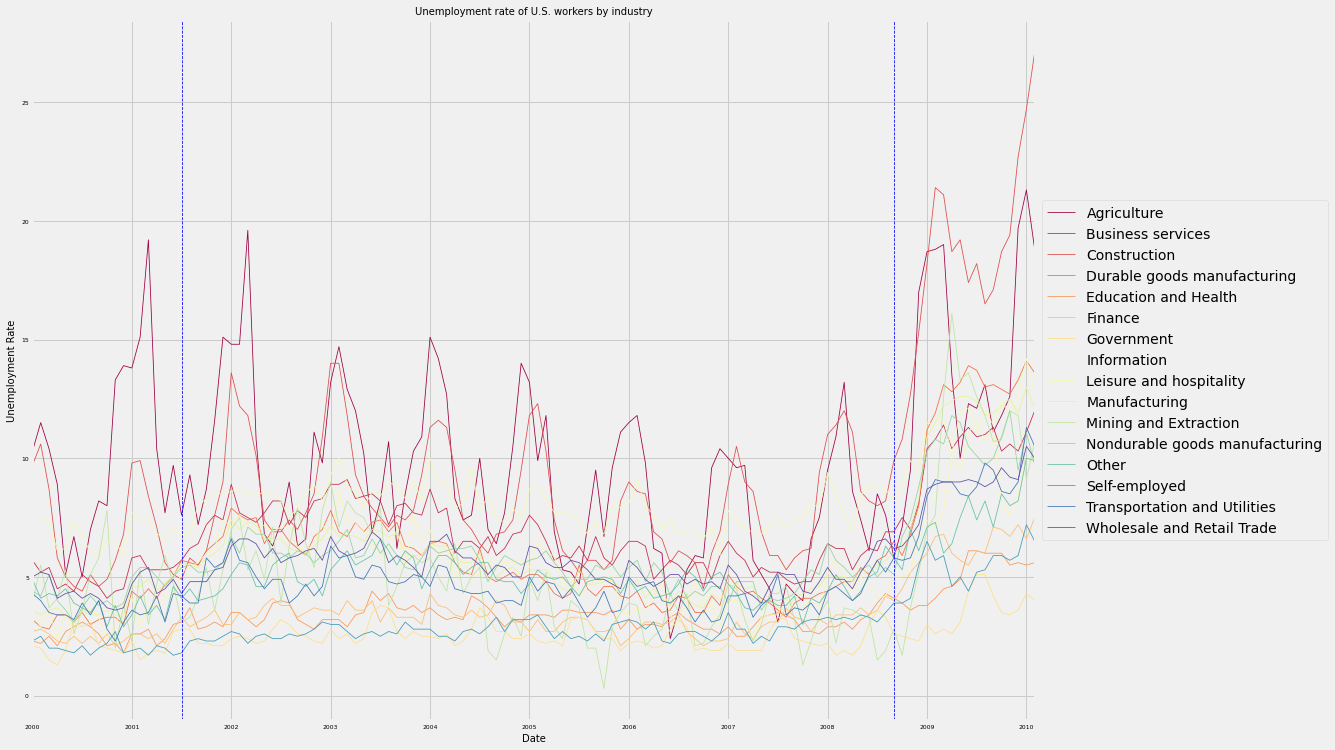

In [17]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

> **Plot monthly and yearly trends**

ike we saw in Chapter 2, when the index of a DataFrame is of the datetime type, it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the .index.year attribute. You can then use the .groupby() and .mean() methods to compute the mean annual value of each time series in your DataFrame:

```python
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
```

You will now apply what you have learned to display the aggregate mean values of each time series in the jobs DataFrame.

Instructions: <br>

- Extract the month for each of the dates in the index of jobs and assign them to index_month.
- Compute the monthly mean unemployment rate in jobs and assign it to jobs_by_month.
- Plot all the columns of jobs_by_month.

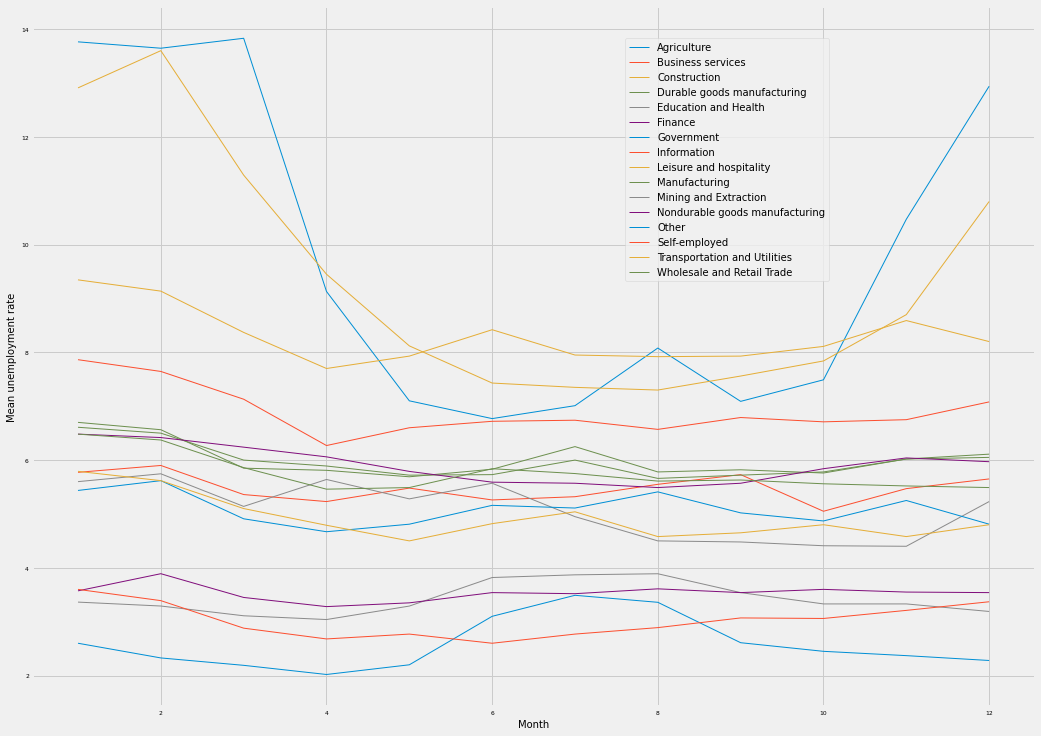

In [18]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

Instructions: <br>

- Extract the year for each of the dates in the index of jobs and assign them to index_year.
- Compute the yearly mean unemployment rate in jobs and assign it to jobs_by_year.
- Plot all the columns of jobs_by_year.

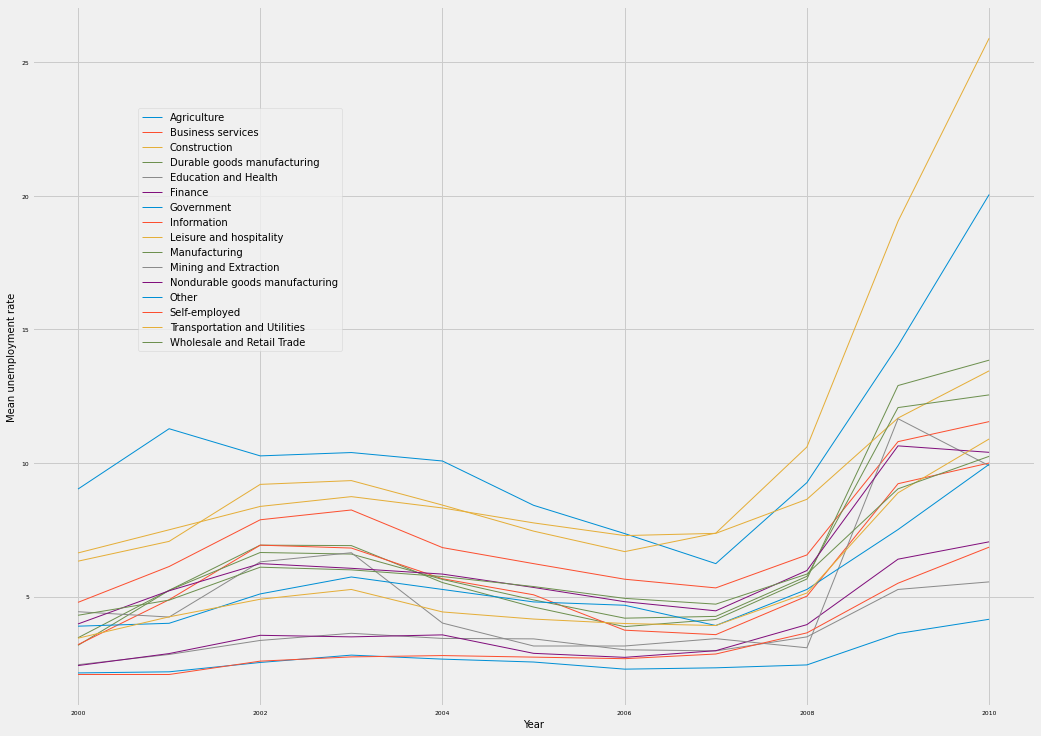

In [19]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

### Decompose time series data

> **Apply time series decomposition to your dataset**

You will now perform time series decomposition on multiple time series. You can achieve this by leveraging the Python dictionary to store the results of each time series decomposition.

In this exercise, you will initialize an empty dictionary with a set of curly braces, {}, use a for loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, you place the results in the dictionary by using the command my_dict[key] = value, where my_dict is your dictionary, key is the name of the column/time series, and value is the decomposition object of that time series.

Instructions: <br>

- Initialize an empty dictionary called jobs_decomp.
- Extract the column names of the jobs DataFrame and place the results in a list called jobs_names.
- Iterate through each column in jobs_names and apply time series decomposition to that time series. Place the results in the jobs_decomp dictionary, where the column name is the key, and the value is the decomposition of the time series you just performed.

In [21]:
# Import statsmodels.api as sm
import statsmodels.api as sm

In [22]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

> **Visualize the seasonality of multiple time series**

You will now extract the seasonality component of jobs_decomp to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of seasonality components into a DataFrame using the pd.DataFrame.from_dict() function.

An empty dictionary jobs_seasonal and the time series decomposition object jobs_decomp from the previous exercise are available in your workspace.

Instructions: <br>

- Iterate through each column name in jobs_names and extract the corresponding seasonal component from jobs_decomp. Place the results in the jobs_seasonal, where the column name is the name of the time series, and the value is the seasonal component of the time series.
- Convert jobs_seasonal to a DataFrame and call it seasonality_df.
- Create a facetted plot of all 16 columns in seasonality_df. Ensure that the subgraphs do

In [24]:
jobs_seasonal = {}

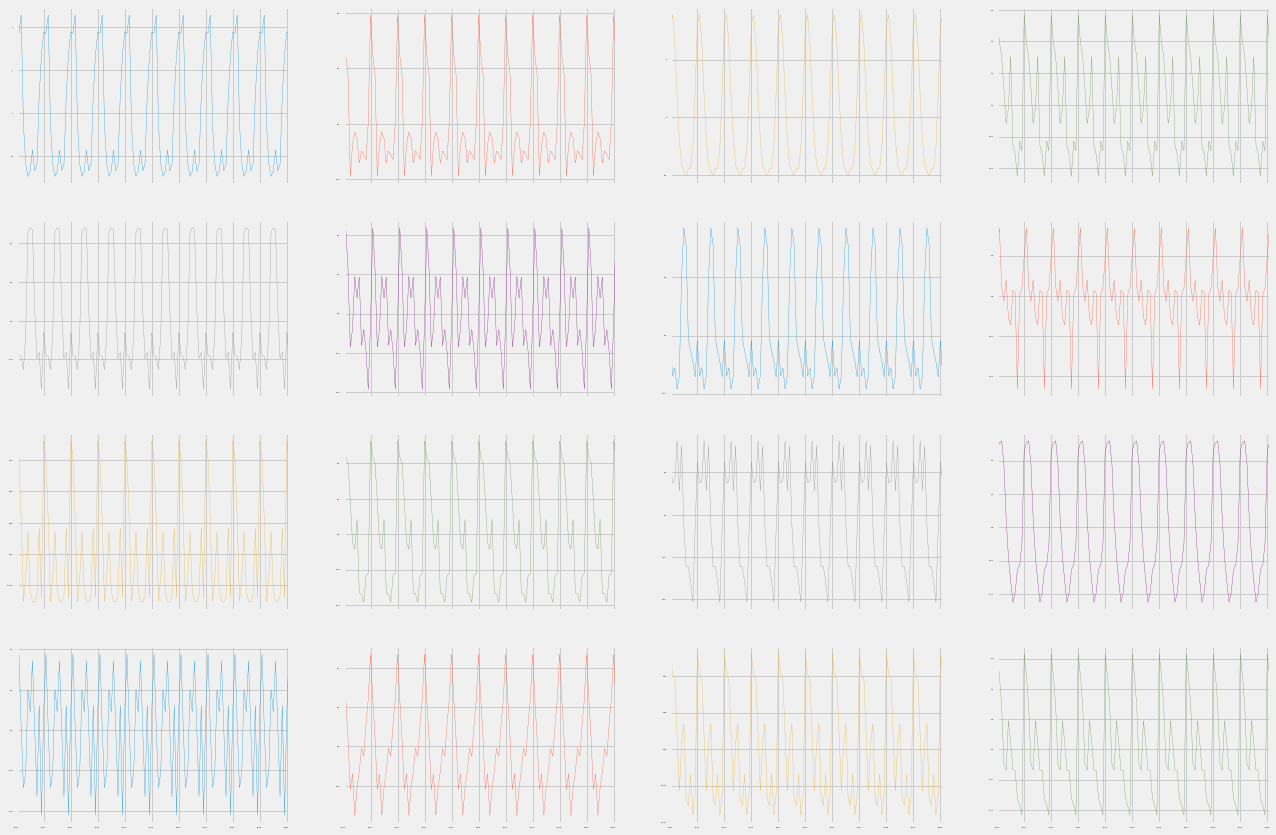

In [27]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionnary
seasonality_df = pd.DataFrame(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   figsize=(20,14),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

### Compute correlations between time series

> **Correlations between multiple time series**

In the previous exercise, you extracted the seasonal component of each time series in the jobs DataFrame and stored those results in new DataFrame called seasonality_df. In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help uncover which job industries are the most similar or the most different.

This can be achieved by using the seasonality_df DataFrame and computing the correlation between each time series in the dataset. In this exercise, you will leverage what you have learned in Chapter 4 to compute and create a clustermap visualization of the correlations between time series in the seasonality_df DataFrame.

Instructions: <br>

- Compute the correlation between all columns in the seasonality_df DataFrame using the spearman method and assign the results to seasonality_corr.
- Create a new clustermap of your correlation matrix.
- Print the correlation value between the seasonalities of the Government and Education & Health industries.

In [36]:

mpl.rcParams['figure.figsize'] = (18, 18)

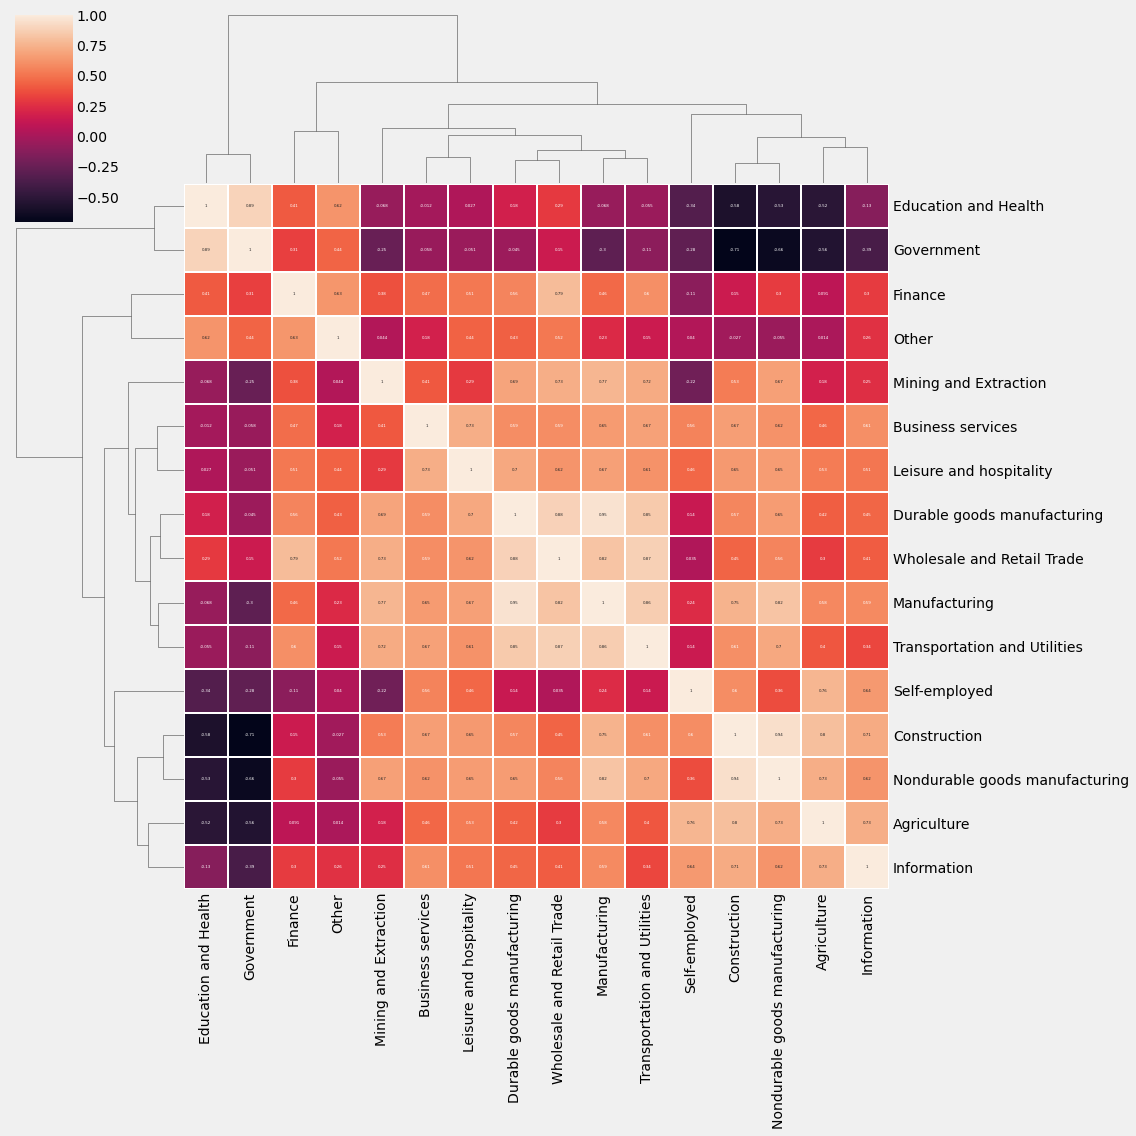

0.89


In [37]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(16, 16))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)

> **Interpret correlations**


The time series in the jobs DataFrame contain multiple time series with very different seasonalities. Using the clustermap of the correlation plots that you generated in the previous exercise, can you identify and discuss which time series is the most correlated to the Self-Employed job?

![](./images/ch5_ex13.png)

***Answer: Agriculture***